In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


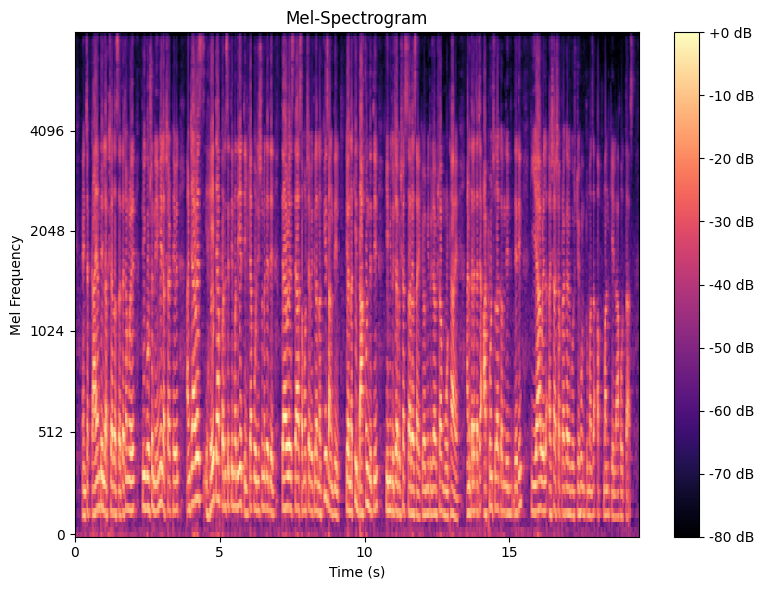

Spectrogram saved to /Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/spectrogram.png


In [ ]:
audio_path = "/Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/Test.wav" 
y, sr = librosa.load(audio_path, sr=None)

    # Compute mel-spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

    
plt.figure(figsize=(8, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.tight_layout()

    
plt.savefig('/Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/spectrogram.png')
plt.show()
print(f"Spectrogram saved to /Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/spectrogram.png")

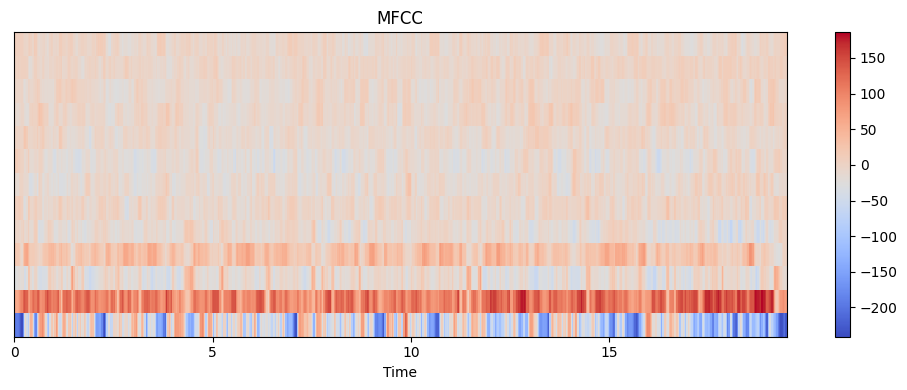

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/Test.wav", sr=None)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)


plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [4]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def generate_combined_spectrogram_from_folder(folder_path, save_path="combined_spectrogram.png"):
    combined_signal = np.array([])
    sr_reference = None

    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith(".wav"):
            file_path = os.path.join(folder_path, fname)
            y, sr = librosa.load(file_path, sr=None)

            if sr_reference is None:
                sr_reference = sr
            elif sr != sr_reference:
                y = librosa.resample(y, orig_sr=sr, target_sr=sr_reference)

            combined_signal = np.concatenate((combined_signal, y))

    if len(combined_signal) == 0:
        print("❌ No audio files found or loaded.")
        return

    # Generate Mel spectrogram
    S = librosa.feature.melspectrogram(y=combined_signal, sr=sr_reference, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot and save
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(S_dB, sr=sr_reference, cmap='magma', x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Combined Spectrogram - {os.path.basename(folder_path)}')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

    print(f"✅ Combined spectrogram saved as: {save_path}")

In [5]:
generate_combined_spectrogram_from_folder(
    folder_path="/Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/Orignal Database",
    save_path="original_combined_spectrogram.png"
)

✅ Combined spectrogram saved as: original_combined_spectrogram.png


In [7]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def generate_combined_spectrogram_from_folder(folder_path, save_path="combined_spectrogram.png"):
    combined_signal = np.array([])
    sr_reference = None

    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith(".m4a"):
            file_path = os.path.join(folder_path, fname)
            y, sr = librosa.load(file_path, sr=None)

            if sr_reference is None:
                sr_reference = sr
            elif sr != sr_reference:
                y = librosa.resample(y, orig_sr=sr, target_sr=sr_reference)

            combined_signal = np.concatenate((combined_signal, y))

    if len(combined_signal) == 0:
        print("❌ No audio files found or loaded.")
        return

    # Generate Mel spectrogram
    S = librosa.feature.melspectrogram(y=combined_signal, sr=sr_reference, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot and save
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(S_dB, sr=sr_reference, cmap='magma', x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Combined Spectrogram - {os.path.basename(folder_path)}')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

    print(f"✅ Combined spectrogram saved as: {save_path}")

In [8]:
generate_combined_spectrogram_from_folder(
    folder_path="/Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/Spoofed data 1m",
    save_path="Spoofed_1m_combined_spectrogram.png"
)

/var/folders/mz/_mgl45y53018fg9xtlkwt0_m0000gn/T/ipykernel_4918/2182927317.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/Users/rohitlabade/Desktop/SAMSUNG-LID-MARATHI/.venv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Combined spectrogram saved as: Spoofed_1m_combined_spectrogram.png
